Dataset:- https://www.kaggle.com/datasets/khushichoudhary1020/ice-cream-selling-data

# STEP 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2. Load Dataset

In [ ]:
df = pd.read_csv("./Datasets/Ice_cream_selling_data.csv")

In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


# STEP 3: BASIC EDA

In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [ ]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

In [ ]:
# Rename columns for clarity (if needed)

if 'Temperature (°C)' in df.columns:
    df.rename(columns={'Temperature (°C)': 'Temperature', 'Ice Cream Sales (units)': 'Sales'}, inplace=True)


In [ ]:
df.columns

Index(['Temperature', 'Sales'], dtype='object')

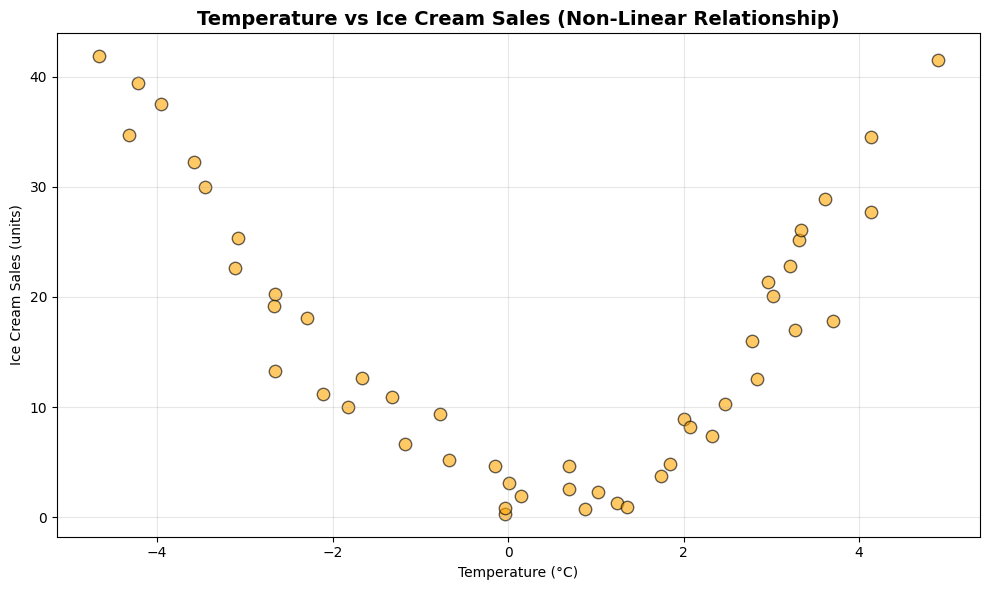


Observation: Sales increase non-linearly with temperature
This suggests polynomial regression (degree 2-3) will work best


In [ ]:
# Visulize the Relatationship
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature'], df['Sales'], color='orange', s=80, alpha=0.6, edgecolor='black')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title('Temperature vs Ice Cream Sales (Non-Linear Relationship)',
          fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservation: Sales increase non-linearly with temperature")
print("This suggests polynomial regression (degree 2-3) will work best")

In [ ]:
# Correlation
corr = df.corr()
print(f"Correlation Between Temperature and Sales: {corr.iloc[0,1]:.4f}")

Correlation Between Temperature and Sales: -0.1752


# STEP 4: Data Preparation

In [ ]:
# Features and Target

X = df[['Temperature']].values
y = df['Sales'].values

In [ ]:
X.shape

(49, 1)

In [ ]:
y.shape

(49,)

## Split the datasets in to Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(39, 1)

In [ ]:
X_test.shape

(10, 1)

# STEP 5: Linear Regression Baseline

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction

y_pred_linear = linear_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluatation

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Mean Squared Error: {linear_mse:.4f}")
print(f"Linear Mean Absolute Error: {linear_mae:.4f} Units")
print(f"Linear R2 Score: {linear_r2}")
print(f"Linear RMSE: {rmse:.4f} Units")

Linear Mean Squared Error: 149.3263
Linear Mean Absolute Error: 11.7520 Units
Linear R2 Score: -0.5751270190188227
Linear RMSE: 12.2199 Units


# STEP 6: POLYNOMIAL REGRESSION (DEGREE 2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Transform features

poly_feature = PolynomialFeatures(degree=2)

X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

In [ ]:
X_train_poly[0]

array([ 1.        , -2.11186969,  4.45999359])

In [ ]:
X_train_poly.shape

(39, 3)

In [ ]:
X_test_poly.shape

(10, 3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
poly_rag_model = LinearRegression()
poly_rag_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# predict

y_pred_poly = poly_rag_model.predict(X_test_poly)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluatation

poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Poly Degree 2 Mean Squared Error: {poly_mse}")
print(f"Poly Degree 2 Mean Absolute Error: {poly_mae}")
print(f"Poly Degree 2 R2 Score: {poly_r2}")
print(f"Poly Degree 2 Poly RMSE: {poly_rmse}")

Poly Degree 2 Mean Squared Error: 14.878796440981484
Poly Degree 2 Mean Absolute Error: 3.2299819836597274
Poly Degree 2 R2 Score: 0.843055137193884
Poly Degree 2 Poly RMSE: 3.857304297171988


# STEP 7: POLYNOMIAL REGRESSION (DEGREE 3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_feature_3 = PolynomialFeatures(degree=3)

X_train_poly_3  = poly_feature_3.fit_transform(X_train)
X_test_poly_3 = poly_feature_3.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)

LinearRegression()

In [ ]:
poly_model_3.score(X_test_poly_3, y_test)

0.8405107685716915

In [ ]:
# prediction

y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
poly_mse_3 = mean_squared_error(y_test, y_pred_poly_3)
poly_mae_3 = mean_absolute_error(y_test, y_pred_poly_3)
poly_r2_score_3 = r2_score(y_test, y_pred_poly_3)
poly_rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_poly_3))


print(f"Poly Degree 3 Mean Squared Error: {poly_mse_3}")
print(f"Poly Degree 3 Mean Absolute Error: {poly_mae_3}")
print(f"Poly Degree 3 R2 Score: {poly_r2_score_3}")
print(f"Poly Degree 3 RMSE: {poly_rmse_3}")

Poly Degree 3 Mean Squared Error: 15.120009451229484
Poly Degree 3 Mean Absolute Error: 3.228121129776889
Poly Degree 3 R2 Score: 0.8405107685716915
Poly Degree 3 RMSE: 3.888445634341502


# STEP 8: POLYNOMIAL REGRESSION (DEGREE 4)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_feature_4 = PolynomialFeatures(degree=4)

X_train_poly_4 = poly_feature_4.fit_transform(X_train)
X_test_poly_4 = poly_feature_4.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
poly_model_4 = LinearRegression()
poly_model_4.fit(X_train_poly_4, y_train)

LinearRegression()

In [ ]:
y_pred_poly_4 = poly_model_4.predict(X_test_poly_4)

In [ ]:
poly_mse_4 = mean_squared_error(y_test, y_pred_poly_4)
poly_mae_4 = mean_absolute_error(y_test, y_pred_poly_4)
poly_r2_score_4 = r2_score(y_test, y_pred_poly_4)
poly_rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred_poly_4))


print(f"Poly Degree 4 Mean Squared Error: {poly_mse_4}")
print(f"Poly Degree 4 Mean Absolute Error: {poly_mae_4}")
print(f"Poly Degree 4 R2 Score: {poly_r2_score_4}")
print(f"Poly Degree 4 RMSE: {poly_rmse_4}")

Poly Degree 4 Mean Squared Error: 18.444159664446097
Poly Degree 4 Mean Absolute Error: 3.43761854085144
Poly Degree 4 R2 Score: 0.8054468908427623
Poly Degree 4 RMSE: 4.29466642062525


# STEP 9: VISUALIZATION

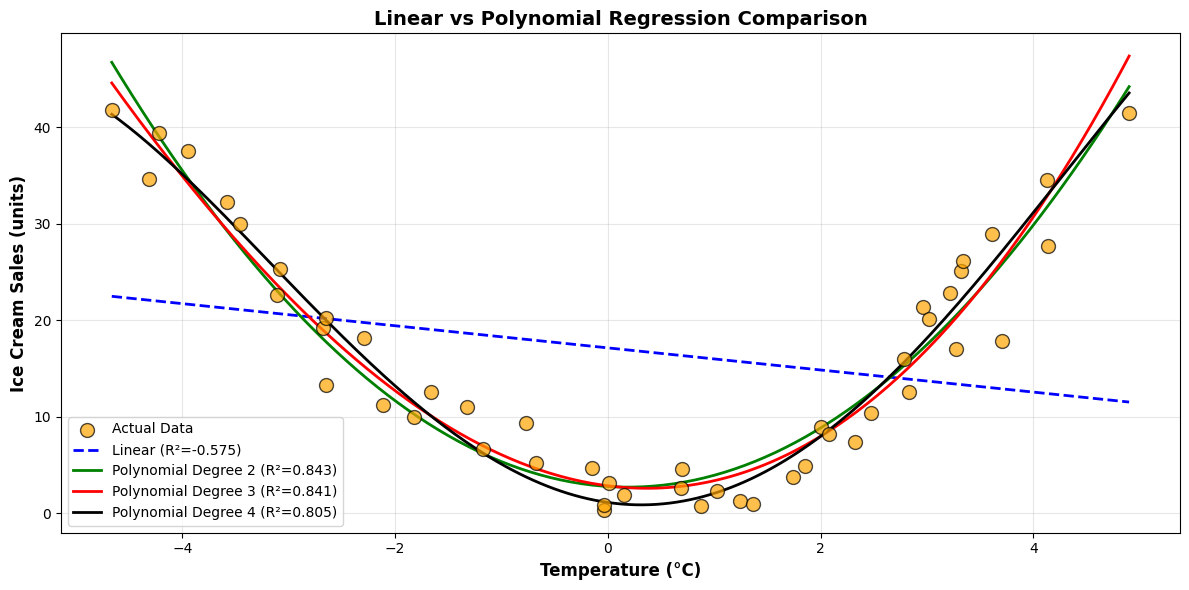

In [ ]:
# Create smooth curve
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_smooth_poly_2 = poly_feature.transform(X_smooth)
X_smooth_poly_3 = poly_feature_3.transform(X_smooth)
X_smooth_poly_4 = poly_feature_4.transform(X_smooth)

y_smooth_linear = linear_model.predict(X_smooth)
y_smooth_poly_2 = poly_rag_model.predict(X_smooth_poly_2)
y_smooth_poly_3 = poly_model_3.predict(X_smooth_poly_3)
y_smooth_poly_4 = poly_model_4.predict(X_smooth_poly_4)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='orange', s=100, alpha=0.7,
            edgecolor='black', label='Actual Data', zorder=3)
plt.plot(X_smooth, y_smooth_linear, color='blue', linewidth=2,
         linestyle='--', label=f'Linear (R²={linear_r2:.3f})')
plt.plot(X_smooth, y_smooth_poly_2, color='green', linewidth=2,
         label=f'Polynomial Degree 2 (R²={poly_r2:.3f})')
plt.plot(X_smooth, y_smooth_poly_3, color='red', linewidth=2,
         label=f'Polynomial Degree 3 (R²={poly_r2_score_3:.3f})')
plt.plot(X_smooth, y_smooth_poly_4, color='black', linewidth=2,
         label=f'Polynomial Degree 4 (R²={poly_r2_score_4:.3f})')

plt.xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
plt.ylabel('Ice Cream Sales (units)', fontweight='bold', fontsize=12)
plt.title('Linear vs Polynomial Regression Comparison',
          fontweight='bold', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()